# **Importing Library**

In [ ]:
import pandas as pd #digunakan untuk mengelola dataframe
import numpy as np #digunakan untuk melakukan perhitungan saintifik
import seaborn as sns #digunakan untuk visualisasi seperti boxplot, plot distribusi, dll
import matplotlib.pyplot as plt #digunakan untuk membuat gambar, membuat area plot pada gambar, memplot beberapa garis pada area plot, menghiasi plot dengan label
%matplotlib inline

# **Import Data**

Membaca dataset yang memiliki format csv yang diberi nama df dengan bantuan library pandas dengan code **`df=pd.read_csv('Telco_Churn.csv)`**. Kemudian untuk menampilkan bisa dipanggil dengan df. 

**Notes** : data yang akan dipakai harus berada dalam directory google colab dengan cara mengupload

In [ ]:
df=pd.read_csv('Telco_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# **Missing Values Checking**

Sebelum mengecek missing values perlu diketahui informasi terkait variable kolom pada setiap dataset, jumlah, dan type data dengan menjalankan code **`df.info()`** dimana df adalah nama dataset yang telah dibuat sebelumnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari output di atas dapat terlihat bahwa jumlah data pada variabel "TotalCharges" kurang dari RangeIndex sehingga dari gambaran tersebut sudah bisa terlihat bahwa terdapat missing value pada kolom TotalCharges.



---

Untuk mengetahui jumlah missing value yang lebih jelas dari setiap variabel pada data bisa menggunakan code **`df.isnull().sum()`** dimana df adalah dataset yang sudah diload sebelumnya kemudian **isnull().sum()** dimaksudkan untuk menghitung jumlah missing value dari setiap variabel.

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dari output di atas terlihat bahwa variabel "TotalCharges" memiliki jumlah missing value sebanyak 11. Sedangkan untuk variabel lainnya bernilai 0 menandakan tidak terdapat missing value.



# **Missing Value Handling**


Karena terdapat missing value pada variabel "TotalCharges" kita akan melihat terlebih dahulu statistik deskriptif dari variabel "TotalCharges". untuk melihat statistik deskripstif pada data (df) kolom "TotalCharges" bisa menggunakan code `df[['TotalCharges']].describe()`, tanda [[' ']] untuk membuat output ditampilkan dalam bentuk frame.

In [ ]:
df[['TotalCharges']].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


Pada saat mengatasi missing value, bisa dilakukan dengan 2 cara yaitu mengisi missing value dengan mean atau median data. Diisi dengan mean apabila data berdistribusi normal dan apabila tidak berdistribusi normal maka harus menggunakan median data untuk menghindari bias data. Berdasarkan output statistik deskriptif terlihat bahwa jarak nilai mean dan median cukup jauh sehingga bisa dikatakan tidak berdisribusi normal tetapi untuk mengecek lebih lanjut bisa menggunakan grafik distribusi dengan code `sns.distplot(df['TotalCharges'])`

<ipython-input-7-f9550ecf1746>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

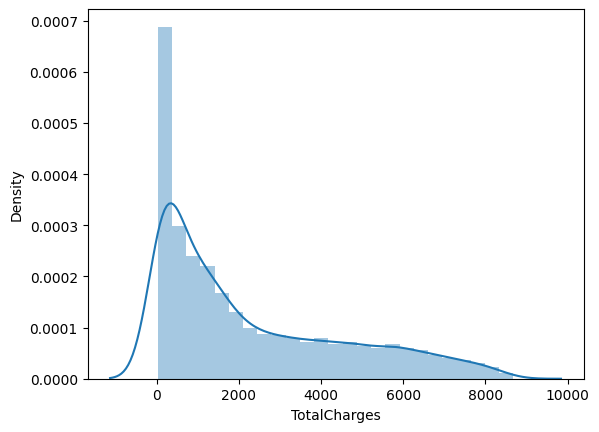

In [ ]:
sns.distplot(df['TotalCharges'])

Dari grafik di atas terlihat bahwa grafik tidak membentuk grafik distribusi normal atau ada skewwness sehingga data "TotalCharges" tidak berdistribusi normal.



---

Karena data tidak bedistribusi normal maka akan diselesaikan permasalahan missing values dengan mengisi menggunakan nilai median data dengan code **`df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())`** dimana df['TotalCharges'] dari dataframe df diambil kolom TotalCharges, kemudian fillna(df['TotalCharges'].median() adalah perintah untuk mengisi missing value pada variabel TotalCharges dengan median.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Kemudian untuk mengecek apakah missing values sudah tidak ada bisa menggunakan code **`df.isnull().sum()`** kembali.

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dari output di atas terlihat bahwa setiap variabel sudah tidak memiliki missing values.

# **Categorical Data Encoding**

Sebelum menentukan jenis encoding harus diketahui terlebih dahulu jumlah kategori dari masing-masing kolom dengan code `df['Kolom yang dipilih'].value_counts()`

In [ ]:
#Mengetahui kategori pada kolom customerID
df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom gender
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom Partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom Dependents
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom PhoneService 
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom MultipleLines
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom InternetService
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom OnlineSecurity
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom OnlineBackup
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom DeviceProtection
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom TechSupport
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom StreamingTV
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom StreamingMovies
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom Contract
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom PaperlessBilling
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom PaymentMethod
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
#Mengetahui kategori pada kolom Churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Setelah mengetahui banyaknya kategori pada masing-masing kolom yang bertipe object bisa dilakukan encoding data. 

Encoding data yang memiliki 2 kategori seperti "yes" dan "no" atau "male" dan "female" bisa dilakukan dengan encoding data atau merubah data object/string kedalam bentuk kategori dengan code `df['kolom yang dipilih'] = df['kolom yang dipilih'].astype('category').cat.codes`. 

Dalam dataframe kolom yang memiliki 2 kategori adalah kolom gender, Partner, Dependents, PhoneService, PaperlessBilling, dan Churn. Dengan keterangan (gender) 0=female dan 1=male. Kemudian untuk (Partner, Dependents, PhoneService, PaperlessBilling, dan Churn) 0=No dan 1=Yes.



In [ ]:
df['gender'] = df['gender'].astype('category').cat.codes #untuk mengubah type gender ke tipe kategori
df['Partner'] = df['Partner'].astype('category').cat.codes #untuk mengubah type Partner ke tipe kategori
df['Dependents'] = df['Dependents'].astype('category').cat.codes #untuk mengubah type Dependents ke tipe kategori
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes #untuk mengubah type PhoneService ke tipe kategori
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes #untuk mengubah type PaperlessBilling ke tipe kategori
df['Churn'] = df['Churn'].astype('category').cat.codes #untuk mengubah type Churn ke tipe kategori
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int8   


Untuk data yang memilki lebih dari 2 kategori bisa dilakukan dengan one hot labelling atau frequency labelling. Hal ini karena metode label encoding kurang mempresentasikan data awal. Berdasarkan identifikasi jumlah kategori terdapat 10 kolom data yang memilki lebih dari 2 kategori dan apabila menggunakan one hot labelling setidaknya akan terbentuk lebih dari 20 kolom baru. Hal ini tentu kurang baik digunakan karena bisa menghasilkan spare data. Oleh karena itu, untuk meminimalisir hal tersebut digunakan metode frequency labelling. Code untuk frequency labelling :

`namafreq = namadataframe['namakolom'].value_counts().reset_index()`

`namafreq.rename(columns={"index": "namakolom", "namakolom": "freq_namakolom"}, inplace = True)`

`namafreq['pct_namakolom'] = round((namafreq['freq_namakolom']/namafreq['freq_namakolom'].sum())*100,2)`

`namadataframe = namadataframe.merge(namafreq[['namakolom','pct_namakolom']], on='namakolom', how='inner')`

code ini akan diterapkan pada setiap kolom yang memilki lebih dari 2 kategori

In [ ]:
freq_et = df['MultipleLines'].value_counts().reset_index()
freq_et.rename(columns={"index": "MultipleLines", "MultipleLines": "freq_MultipleLines"}, inplace = True)
freq_et['pct_MultipleLines'] = round((freq_et['freq_MultipleLines']/freq_et['freq_MultipleLines'].sum())*100,2)
df = df.merge(freq_et[['MultipleLines','pct_MultipleLines']], on='MultipleLines', how='inner')

freq_et = df['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et['pct_InternetService'] = round((freq_et['freq_InternetService']/freq_et['freq_InternetService'].sum())*100,2)
df = df.merge(freq_et[['InternetService','pct_InternetService']], on='InternetService', how='inner')

freq_et = df['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et['pct_OnlineSecurity'] = round((freq_et['freq_OnlineSecurity']/freq_et['freq_OnlineSecurity'].sum())*100,2)
df = df.merge(freq_et[['OnlineSecurity','pct_OnlineSecurity']], on='OnlineSecurity', how='inner')

freq_et = df['OnlineBackup'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineBackup", "OnlineBackup": "freq_OnlineBackup"}, inplace = True)
freq_et['pct_OnlineBackup'] = round((freq_et['freq_OnlineBackup']/freq_et['freq_OnlineBackup'].sum())*100,2)
df = df.merge(freq_et[['OnlineBackup','pct_OnlineBackup']], on='OnlineBackup', how='inner')

freq_et = df['DeviceProtection'].value_counts().reset_index()
freq_et.rename(columns={"index": "DeviceProtection", "DeviceProtection": "freq_DeviceProtection"}, inplace = True)
freq_et['pct_DeviceProtection'] = round((freq_et['freq_DeviceProtection']/freq_et['freq_DeviceProtection'].sum())*100,2)
df = df.merge(freq_et[['DeviceProtection','pct_DeviceProtection']], on='DeviceProtection', how='inner')

freq_et = df['TechSupport'].value_counts().reset_index()
freq_et.rename(columns={"index": "TechSupport", "TechSupport": "freq_TechSupport"}, inplace = True)
freq_et['pct_TechSupport'] = round((freq_et['freq_TechSupport']/freq_et['freq_TechSupport'].sum())*100,2)
df = df.merge(freq_et[['TechSupport','pct_TechSupport']], on='TechSupport', how='inner')

freq_et = df['StreamingTV'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingTV", "StreamingTV": "freq_StreamingTV"}, inplace = True)
freq_et['pct_StreamingTV'] = round((freq_et['freq_StreamingTV']/freq_et['freq_StreamingTV'].sum())*100,2)
df = df.merge(freq_et[['StreamingTV','pct_StreamingTV']], on='StreamingTV', how='inner')

freq_et = df['StreamingMovies'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingMovies", "StreamingMovies": "freq_StreamingMovies"}, inplace = True)
freq_et['pct_StreamingMovies'] = round((freq_et['freq_StreamingMovies']/freq_et['freq_StreamingMovies'].sum())*100,2)
df = df.merge(freq_et[['StreamingMovies','pct_StreamingMovies']], on='StreamingMovies', how='inner')

freq_et = df['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['pct_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
df = df.merge(freq_et[['Contract','pct_Contract']], on='Contract', how='inner')

freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['pct_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
df = df.merge(freq_et[['PaymentMethod','pct_PaymentMethod']], on='PaymentMethod', how='inner')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,pct_MultipleLines,pct_InternetService,pct_OnlineSecurity,pct_OnlineBackup,pct_DeviceProtection,pct_TechSupport,pct_StreamingTV,pct_StreamingMovies,pct_Contract,pct_PaymentMethod
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.90,39.54,55.02,33.58
1,8665-UTDHZ,1,0,1,1,1,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.90,39.54,55.02,33.58
2,6235-VDHOM,0,1,0,0,5,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.90,39.54,55.02,33.58
3,6543-CPZMK,1,0,1,1,9,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.90,39.54,55.02,33.58
4,0811-GSDTP,0,0,0,1,13,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.90,39.54,55.02,33.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3118-UHVVQ,0,0,1,0,68,1,Yes,No,No internet service,...,42.18,21.67,21.67,21.67,21.67,21.67,21.67,21.67,24.07,21.61
7039,2452-MRMZF,0,1,1,0,72,1,Yes,No,No internet service,...,42.18,21.67,21.67,21.67,21.67,21.67,21.67,21.67,24.07,21.61
7040,2509-TFPJU,1,0,1,0,72,1,Yes,No,No internet service,...,42.18,21.67,21.67,21.67,21.67,21.67,21.67,21.67,24.07,21.61
7041,4707-MAXGU,1,0,1,0,72,1,Yes,No,No internet service,...,42.18,21.67,21.67,21.67,21.67,21.67,21.67,21.67,24.07,21.61


Dari output di atas terlihat bahwa telah terbentuk kolom baru yang berisi data categorical numerik dari kolom yang memilki lebih dari 2 kategori

Kemudian cek kembali tipe data dari masing-masing kolom dengan code **`df.info()`** dimana df adalah nama dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   int8   
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   int8   
 4   Dependents            7043 non-null   int8   
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int8   
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   object 
 10  OnlineBackup          7043 non-null   object 
 11  DeviceProtection      7043 non-null   object 
 12  TechSupport           7043 non-null   object 
 13  StreamingTV           7043 non-null   object 
 14  StreamingMovies       7043 non-null   object 
 15  Contract             

# **Anomalies dan Outlier**

Tampilkan 5 data teratas untuk memastikan data sudah sesuai setelah di Encoding dengan code `df.head()` dimana df dalah nama dataframe

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,pct_MultipleLines,pct_InternetService,pct_OnlineSecurity,pct_OnlineBackup,pct_DeviceProtection,pct_TechSupport,pct_StreamingTV,pct_StreamingMovies,pct_Contract,pct_PaymentMethod
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.9,39.54,55.02,33.58
1,8665-UTDHZ,1,0,1,1,1,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.9,39.54,55.02,33.58
2,6235-VDHOM,0,1,0,0,5,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.9,39.54,55.02,33.58
3,6543-CPZMK,1,0,1,1,9,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.9,39.54,55.02,33.58
4,0811-GSDTP,0,0,0,1,13,0,No phone service,DSL,No,...,9.68,34.37,49.67,34.49,43.94,49.31,39.9,39.54,55.02,33.58


Akan dideteksi outlier pada data dengan tipe integer dan float non categoric yaitu kolom tenure, MonthlyCharges, dan Total Charges. Untuk mengetahui ada tidaknya outlier pada data bisa menggunakan boxplot dengan code 


> `f,ax = plt.subplots(panjang axis,figsize=(panjang,lebar))`

> `g = sns.distplot(df['namakolom'],kde=True, ax=ax[koordinat axis])` #untuk membuat plot

> `ax[0,0].set_title('namakolom - Original')` #untuk memberikan judul pada grafik distribusi

> `ax[0,0].set_xlabel('')` #untuk memberi nama sumbu x

> `g = sns.boxplot(df['namakolom'],color='warna grafik',orient='h', ax=ax[koordinat grafik])` #untuk membuat boxplot

> `ax[0,1].set_title('nama kolom - Original')` #untuk memberikan judul pada boxplot

> `ax[0,1].set_xlabel('')`#untuk memberi nama sumbu x

Dimana sns.boxplot yaitu untuk membentuk boxplot dengan bantuan library seaborn dan orient='h' untuk menentukan orientasi boxplotnya disini 'h' bermakna diposisikan secara horizontal.

<ipython-input-32-b978ee2750c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['tenure'],kde=True, ax=ax[0,0])
<ipython-input-32-b978ee2750c4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['MonthlyCharges'],kde=True, ax=ax[1,0])
<ipython-input-32-b978ee2750c4>:19: UserWarning

Text(0.5, 0, '')

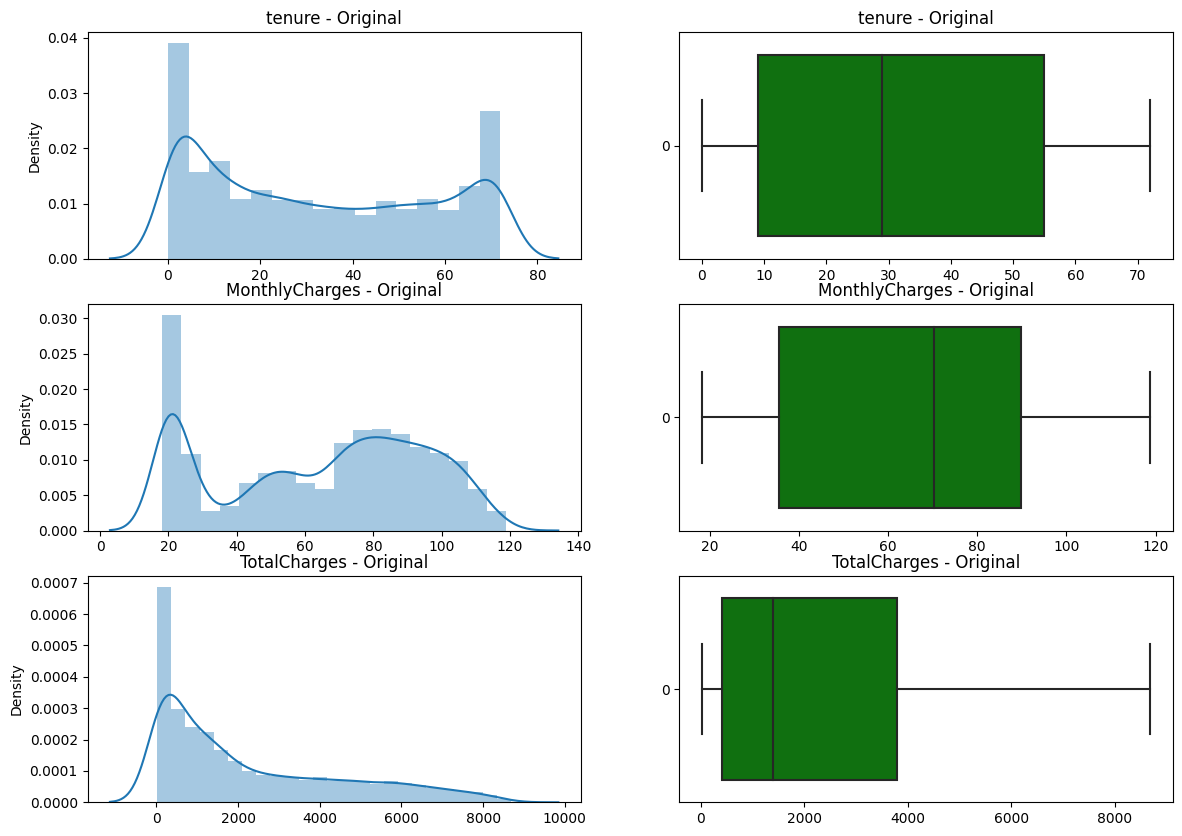

In [ ]:
f,ax = plt.subplots(3,2,figsize=(14,10))

g = sns.distplot(df['tenure'],kde=True, ax=ax[0,0])
ax[0,0].set_title('tenure - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(df['tenure'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('tenure - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(df['MonthlyCharges'],kde=True, ax=ax[1,0])
ax[1,0].set_title('MonthlyCharges - Original')
ax[1,0].set_xlabel('')

g = sns.boxplot(df['MonthlyCharges'],color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('MonthlyCharges - Original')
ax[1,1].set_xlabel('')

g = sns.distplot(df['TotalCharges'],kde=True, ax=ax[2,0])
ax[2,0].set_title('TotalCharges - Original')
ax[2,0].set_xlabel('')

g = sns.boxplot(df['TotalCharges'],color='green',orient='h', ax=ax[2,1])
ax[2,1].set_title('TotalCharges - Original')
ax[2,1].set_xlabel('')

Berdasarkan output di atas terlihat pada output boxplot bahwa ketiga variabel yaitu tenure, MonthlyCharges, dan TotalCharges tidak memiliki outlier atau nilai yang kurang dari batas minimum atau nilai yang lebih dari batas maksimum.